In [41]:
import h5py
import pandas as pd
import numpy as np
from IPython.core.display import HTML

styles = """
<style>
h1 {
    font-size: 36px;
    color: blue;
}
h2 {
    font-size: 30px;
    color: green;
}
p {
    font-size: 20px;
    color: red;
}
ul {
    font-size: 18px;
    color: purple;
}
</style>
"""

HTML(styles)

# CARGAR LA DATA 


In [2]:
import h5py

# Abrir el archivo HDF5 en modo lectura
with h5py.File('train.h5', 'r') as file:
    def printname(name):
        print(name)
    
    # Usar la función visit para imprimir todos los nombres de conjuntos de datos y grupos
    
    file.visit(printname)
    


body_acc_x
body_acc_y
body_acc_z
body_gyro_x
body_gyro_y
body_gyro_z
total_acc_x
total_acc_y
total_acc_z
y


In [109]:
def process_variable(data, variable_name):
    num_windows = data.shape[0]
    num_points_per_window = data.shape[1]
    
    temp_df = pd.DataFrame({
        'id': np.repeat(np.arange(num_windows), num_points_per_window),
        'time': np.tile(np.arange(num_points_per_window), num_windows),
        'value': data.flatten()
    })

    return temp_df

In [108]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

def custom_feature_params():
    settings = {
        'mean': None,
        'standard_deviation': None,
        'variance': None,
        'maximum': None,
        'minimum': None,
        'median': None,
        'mean_abs_change': None,
        'mean_change': None,
        'sum_of_reoccurring_data_points': None,
        'abs_energy': None,
        'sample_entropy': None
    }
    return settings

# Use these


In [110]:
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.distribution import MultiprocessingDistributor
from tsfresh.feature_extraction import ComprehensiveFCParameters 
import os

with h5py.File('train.h5', 'r') as file:
    body_acc_x = file['body_acc_x'][:]
    body_acc_y = file['body_acc_y'][:]
    body_acc_z = file['body_acc_z'][:]
    body_gyro_x = file['body_gyro_x'][:]
    body_gyro_y = file['body_gyro_y'][:]
    body_gyro_z = file['body_gyro_z'][:]
    total_acc_x = file['total_acc_x'][:]
    total_acc_y = file['total_acc_y'][:]
    total_acc_z = file['total_acc_z'][:]
    y = file['y'][:]  

variables = {
    'body_acc_x': body_acc_x,
    'body_acc_y': body_acc_y,
    'body_acc_z': body_acc_z,
    'body_gyro_x': body_gyro_x,
    'body_gyro_y': body_gyro_y,
    'body_gyro_z': body_gyro_z,
    'total_acc_x': total_acc_x,
    'total_acc_y': total_acc_y,
    'total_acc_z': total_acc_z
}

# Definición de parámetros personalizados
custom_settings = custom_feature_params()
# Configuración del distribuidor
num_cores = os.cpu_count()



if(os.path.exists('data.csv')):
    df_activity = pd.read_csv('data.csv')
else:
    df_signals = {}
    df_activity = pd.DataFrame()
    for variable_name in variables:
        df_temp = process_variable(variables[variable_name], variable_name)
        distributor = MultiprocessingDistributor(n_workers=num_cores, disable_progressbar=False,
                                             progressbar_title="Extracción de features")
        x_train_features = extract_features(df_temp, column_id='id', column_sort='time',
                                            default_fc_parameters=custom_settings, distributor=distributor)
    

    
        x_train_features = pd.DataFrame(x_train_features)
        x_train_features.columns = [f"{col}_{variable_name}" for col in x_train_features.columns]
        df_activity = pd.concat([df_activity , x_train_features], axis=1)
        
    df_activity.to_csv('data.csv', index=False)   




Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 24.45it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 26.97it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 26.69it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 27.11it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 27.46it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 25.72it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 27.52it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 26.49it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 119/119 [00:04<00:00, 25.83it/s]


<class 'pandas.core.frame.DataFrame'>


In [57]:

print(df_activity.head()) 
print(df_activity.shape)

   value__mean_body_acc_x  value__standard_deviation_body_acc_x  \
0                0.002269                              0.002941   
1                0.000174                              0.001981   
2                0.000428                              0.002908   
3                0.000329                              0.002678   
4               -0.000195                              0.002015   

   value__variance_body_acc_x  value__maximum_body_acc_x  \
0                    0.000009                   0.010810   
1                    0.000004                   0.005251   
2                    0.000008                   0.008167   
3                    0.000007                   0.008167   
4                    0.000004                   0.005650   

   value__minimum_body_acc_x  value__median_body_acc_x  \
0                  -0.004294                  0.002025   
1                  -0.006706                  0.000110   
2                  -0.010483                  0.000627   
3   

## Partir data para train y test


In [130]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_activity, y, test_size=0.3, random_state=50) #data no PCA


print("xtrain",X_train.shape)

print("ytrain",y_train.shape)

xtrain (5146, 99)
ytrain (5146,)


## Cargando data for testing

In [112]:
import h5py

# Abrir el archivo HDF5 en modo lectura
with h5py.File('test.h5', 'r') as file:
    def printname(name):
        print(name)
    
    # Usar la función visit para imprimir todos los nombres de conjuntos de datos y grupos
    
    file.visit(printname)
    

body_acc_x
body_acc_y
body_acc_z
body_gyro_x
body_gyro_y
body_gyro_z
total_acc_x
total_acc_y
total_acc_z


In [60]:
with h5py.File('test.h5', 'r') as file:
    body_acc_x = file['body_acc_x'][:]
    body_acc_y = file['body_acc_y'][:]
    body_acc_z = file['body_acc_z'][:]
    body_gyro_x = file['body_gyro_x'][:]
    body_gyro_y = file['body_gyro_y'][:]
    body_gyro_z = file['body_gyro_z'][:]
    total_acc_x = file['total_acc_x'][:]
    total_acc_y = file['total_acc_y'][:]
    total_acc_z = file['total_acc_z'][:]  

variables = {
    'body_acc_x': body_acc_x,
    'body_acc_y': body_acc_y,
    'body_acc_z': body_acc_z,
    'body_gyro_x': body_gyro_x,
    'body_gyro_y': body_gyro_y,
    'body_gyro_z': body_gyro_z,
    'total_acc_x': total_acc_x,
    'total_acc_y': total_acc_y,
    'total_acc_z': total_acc_z
}

if(os.path.exists('data_test.csv')):
    df_activity_test = pd.read_csv('data_test.csv')
else:

    df_activity_test = pd.DataFrame()
    for variable_name in variables:
        df_temp = process_variable(variables[variable_name], variable_name)
        distributor = MultiprocessingDistributor(n_workers=num_cores, disable_progressbar=False,
                                             progressbar_title="Extracción de features")
        x_test_features = extract_features(df_temp, column_id='id', column_sort='time',
                                            default_fc_parameters=custom_settings, distributor=distributor)
    
        print(type(x_test_features))
    
        x_test_features = pd.DataFrame(x_test_features)
        x_test_features.columns = [f"{col}_{variable_name}" for col in x_test_features.columns]
        df_activity_test = pd.concat([df_activity_test , x_test_features], axis=1)
    df_activity_test.to_csv('data_test.csv' , index=False)
       

Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 20.41it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 20.62it/s] 


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 21.70it/s] 


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 23.17it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 20.79it/s] 


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 21.44it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 21.05it/s] 


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 22.65it/s]


<class 'pandas.core.frame.DataFrame'>


Extracción de features: 100%|██████████| 118/118 [00:05<00:00, 21.44it/s]


<class 'pandas.core.frame.DataFrame'>


In [65]:
print(df_activity_test.head())
print(df_activity_test.shape)

   value__mean_body_acc_x  value__standard_deviation_body_acc_x  \
0               -0.004204                              0.021347   
1                0.001742                              0.009370   
2               -0.000431                              0.003413   
3               -0.001500                              0.003114   
4               -0.000565                              0.003403   

   value__variance_body_acc_x  value__maximum_body_acc_x  \
0                    0.000456                   0.037886   
1                    0.000088                   0.037886   
2                    0.000012                   0.007788   
3                    0.000010                   0.008221   
4                    0.000012                   0.008221   

   value__minimum_body_acc_x  value__median_body_acc_x  \
0                  -0.094248                 -0.000095   
1                  -0.060568                  0.001639   
2                  -0.007371                 -0.000332   
3   

# Cargar librerias para experimentos y metricas 

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score , f1_score
import random


# Experimentacion con Knn 




In [ ]:
## Variacion de parametros y metricas 

Accuracy:  0.9256572982774252
F1 Score:  0.9257817799562592


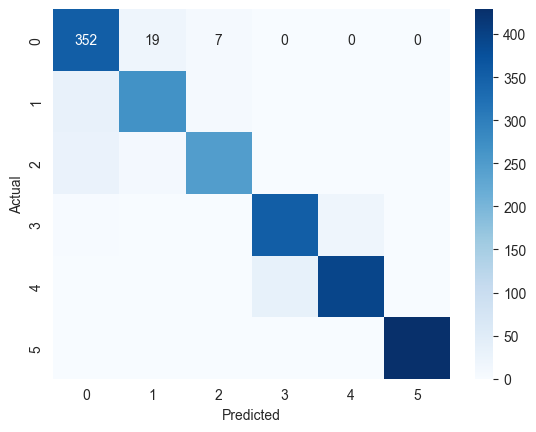

In [62]:
from sklearn.neighbors import KNeighborsClassifier
#KNN 
#USO DEL METODO
# Numero de de vecinos = 3
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy:  0.9084315503173164
F1 Score:  0.9083068672467293


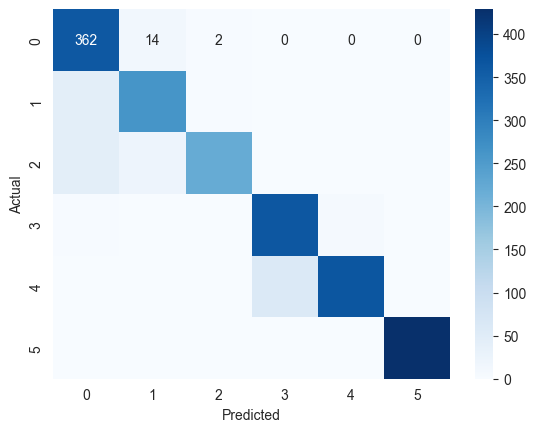

In [98]:

# Numero de de vecinos = 2

knn = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Accuracy:  0.9388032638259293
F1 Score:  0.9388317779426798


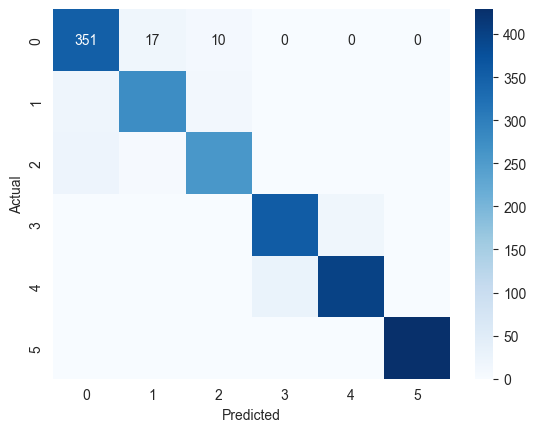

In [113]:
# Numero de de vecinos = 2

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Se hacen pruebas multiples para sacar un accuracy promedio con el modelo usando un solo vecino , que demostro ser el  modelo que mostaba mas accuracy 

In [49]:
#Pruebas multil
number_of_test = 100
mean_accuracy = 0
for i in range(number_of_test):
    # Generar un número aleatorio para la semilla
    seed = random.randint(0, 1000)
    # Dividir los datos
    x_train, X_validation, y_train, Y_validation = train_test_split(df_activity, y, test_size=0.3, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(X_validation)
    # Evaluar el modelo
    accuracy_f = accuracy_score(y_pred, Y_validation)
    mean_accuracy+=accuracy_f
    print("Accuracy for test number" + str(i) + ": ", accuracy_f )
print("MEAN ACCURACY :" , (mean_accuracy/number_of_test)*100)


Accuracy for test number0:  0.929283771532185
Accuracy for test number1:  0.9297370806890299
Accuracy for test number2:  0.9256572982774252
Accuracy for test number3:  0.9297370806890299
Accuracy for test number4:  0.9301903898458749
Accuracy for test number5:  0.9320036264732547
Accuracy for test number6:  0.92883046237534
Accuracy for test number7:  0.9170444242973708
Accuracy for test number8:  0.9252039891205802
Accuracy for test number9:  0.9242973708068903
Accuracy for test number10:  0.9247506799637353
Accuracy for test number11:  0.9310970081595649
Accuracy for test number12:  0.9270172257479601
Accuracy for test number13:  0.9242973708068903
Accuracy for test number14:  0.9261106074342702
Accuracy for test number15:  0.9256572982774252
Accuracy for test number16:  0.9388032638259293
Accuracy for test number17:  0.9256572982774252
Accuracy for test number18:  0.9256572982774252
Accuracy for test number19:  0.9324569356300997
Accuracy for test number20:  0.929283771532185
Accura

Se consigue en accuracy promedio de 92.88% en 100 test de prueba 

# Obtension de resultantdos para KNN 

In [73]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(df_activity, y) #Se carga la todalidad de los datos 
y_pred = knn.predict(df_activity_test) # Se predice sobre los valores de prueba 

#Pasar data a csv
y_pred = pd.DataFrame(y_pred, columns=['result'])
print(y_pred.shape)
y_pred.index += 1
y_pred.index.name = 'ID'
y_pred.to_csv("y_pred_knn_2.csv")

if(os.path.exists('y_pred_knn_2.csv')):
    print("Data guardada correctamente en "+ os.path.abspath('y_pred_knn_2.csv'))
else:
    print("Data guardada incorrectamente")

(2947, 1)
Data guardada correctamente en D:\Semestre_2024-1_CS\ML\Projetcs\Project2\model1\y_pred_knn_2.csv


# Arbol de desicion y Random Forest 

 # importarndo modulos propios de random forest (incluye arbol de desicion) 

In [90]:
from modelos_1 import  RandomForest as RF
from modelos_1 import  DesicionTree as DT

# Experimentacion con arbol de desicion no randomizado

current feature list 
 99
current feature list 
 98
current feature list 
 97
current feature list 
 96
current feature list 
 95
current feature list 
 94
current feature list 
 93
current feature list 
 95
current feature list 
 94
current feature list 
 93
current feature list 
 92
current feature list 
 91
current feature list 
 90
current feature list 
 89
current feature list 
 89
current feature list 
 88
current feature list 
 87
current feature list 
 86
current feature list 
 91
current feature list 
 90
current feature list 
 90
current feature list 
 92
current feature list 
 91
current feature list 
 90
current feature list 
 93
current feature list 
 92
current feature list 
 96
current feature list 
 95
current feature list 
 94
current feature list 
 93
current feature list 
 93
current feature list 
 94
current feature list 
 93
current feature list 
 92
current feature list 
 91
current feature list 
 90
current feature list 
 89
current feature list 
 88
current feat

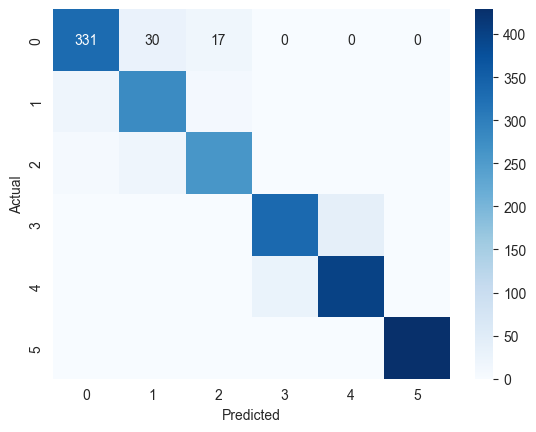

In [116]:
# Se usa la data X_train y y_train partida previamente 
d_t = DT.DescisionTree_(X_train, y_train  ) # se trabaja con todos los features por defecto 
#Advertencia el proceso puede demorar
d_t.fit()
y_pred = d_t.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Experimentacion con arbol de desicion randomizado 
Es como si se usara un random forest con un solo arbol 

current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feat

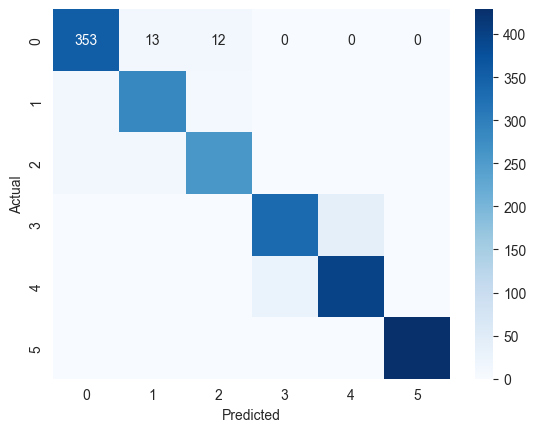

In [117]:
# Se usa la data X_train y y_train partida previamente 
d_t = DT.DescisionTree_(X_train, y_train  , part_random=True , number_of_features=99 ) # se trabaja con todos los features 
#Advertencia el proceso puede demorar
d_t.fit()
y_pred = d_t.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Experimentacion con menos parametros en arbol randomizado
se suele usar raiz de n (siendo n el numero de samples) como se indica en Breiman (2001). Se hace la prueba para observar como de se desempeña un arbol con pocos parametros en relacion a su accuracy cuando esta randomizado . En este caso como la cantidad de features es 99 o casi 100 se escogen 9 features

current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9
current feature list 
 9


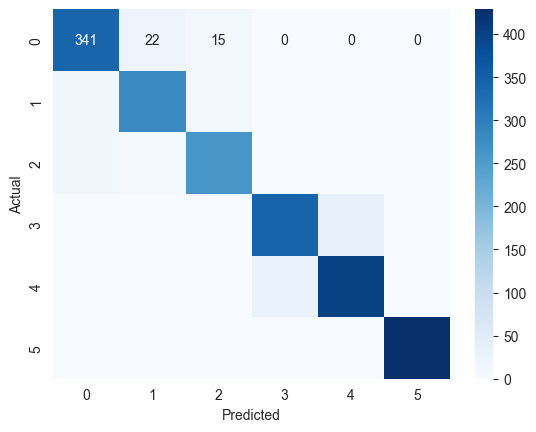

In [119]:
# Se usa la data X_train y y_train partida previamente 
d_t = DT.DescisionTree_(X_train, y_train , part_random=True , number_of_features=9 )
#Advertencia el proceso puede demorar
d_t.fit()
y_pred = d_t.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Se usa la data X_train y y_train partida previamente 
d_t = DT.DescisionTree_(X_train, y_train  , part_random=True , number_of_features=5 ) # se trabaja con todos los features 
#Advertencia el proceso puede demorar
d_t.fit()
y_pred = d_t.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Se prueba con cinco features pero , se observa una caida en el accuracy . En los demas casos se observa que el accuracy permanece alto , pero hay ciertos problemas en la matriz de confucion con todas las clases en relacion a la prediccion de la clase 0. Se intentara hacer las pruebas con un modelo ensamblado que pueda corregir los efectos de sobre clasificacion en la clase 0 y mejorar el overfitting en el que se pueda incurrir , para ello se usa el random forest. 

# Obtencion de resultados con arbol de desicion randomizado
Se usa este metodo , ya que converge mas rapido .

In [124]:
d_t = DT.DescisionTree_(df_activity, y  , part_random=True , number_of_features=99 ) # se trabaja con todos los features 
#Advertencia el proceso puede demorar
d_t.fit()
y_pred = d_t.predict(df_activity_test)

#Pasar data a csv
y_pred = pd.DataFrame(y_pred, columns=['result'])
print(y_pred.shape)
y_pred.index += 1
y_pred.index.name = 'ID'
y_pred.to_csv("y_pred_DT_2.csv")

if(os.path.exists('y_pred_DT_2.csv')):
    print("Data guardada correctamente en "+ os.path.abspath('y_pred_DT_2.csv'))
else:
    print("Data guardada incorrectamente")

current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feature list 
 99
current feat

# Experimentacion Random Forest

Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training tree number 7
Training tree number 8
Training tree number 9
Accuracy:  0.971441523118767
F1 Score:  0.9714351433598923


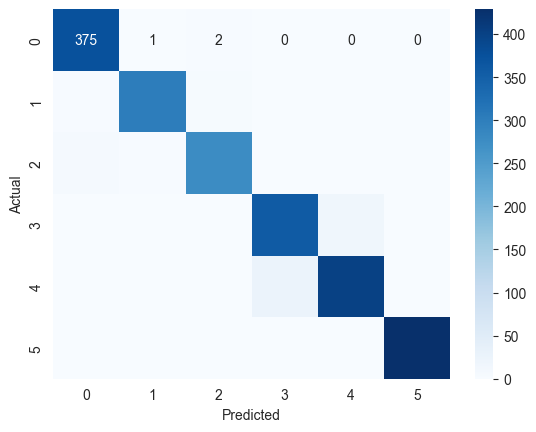

In [131]:
# Se usa la data X_train y y_train partida previamente 
r_f = RF.RandomForest(X_train, y_train , number_of_features=5 , tree_number = 10)
#Advertencia el proceso puede demorar
r_f.fit()
y_pred = r_f.predict(X_test)

#METRICAS DE CALIDAD

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)
print("F1 Score: " , f1_score(y_test, y_pred , average='weighted'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Se observan mejoras en relacion a las pruebas hechas con el arbol de desicion en relacion al accuracy y al F1_score. Se procede a conseguir un arbol con estos parametros dada la velocidad del modelo para converger y el alto accuracy obtenido.

## Se añaden pruebas mulitples con diferente muestreo para hallar el accuracy promedio con los mismos parametros usados anteriormente


In [122]:
#Pruebas multil
number_of_test = 10
mean_accuracy = 0
for i in range(number_of_test):
    # Generar un número aleatorio para la semilla
    seed = random.randint(0, 1000)
    # Dividir los datos
    x_train, X_validation, y_train, Y_validation = train_test_split(df_activity, y, test_size=0.3, random_state=seed)
    r_f = RF.RandomForest(x_train, y_train , number_of_features=5 , tree_number = 10)
    #Advertencia el proceso puede demorar
    r_f.fit()
    y_pred = r_f.predict(X_validation)
    # Evaluar el modelo
    accuracy_f = accuracy_score(y_pred, Y_validation)
    mean_accuracy+=accuracy_f
    print("Accuracy for test number" + str(i) + ": ", accuracy_f )
print("MEAN ACCURACY :" , (mean_accuracy/number_of_test)*100)

Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training tree number 7
Training tree number 8
Training tree number 9
Accuracy for test number0:  0.9732547597461468
Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training tree number 7
Training tree number 8
Training tree number 9
Accuracy for test number1:  0.9614687216681777
Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training tree number 7
Training tree number 8
Training tree number 9
Accuracy for test number2:  0.956029011786038
Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training 

# Obtencion de resultados con Random Forest

In [125]:
r_f = RF.RandomForest(df_activity, y , number_of_features=5 , tree_number = 10)
#Advertencia el proceso puede demorar
r_f.fit()
y_pred = r_f.predict(df_activity_test)

#Pasar data a csv
y_pred = pd.DataFrame(y_pred, columns=['result'])
print(y_pred.shape)
y_pred.index += 1
y_pred.index.name = 'ID'
y_pred.to_csv("y_pred_RF_3.csv")

if(os.path.exists('y_pred_RF_3.csv')):
    print("Data guardada correctamente en "+ os.path.abspath('y_pred_RF_3.csv'))
else:
    print("Data guardada incorrectamente")

Training tree number 0
Training tree number 1
Training tree number 2
Training tree number 3
Training tree number 4
Training tree number 5
Training tree number 6
Training tree number 7
Training tree number 8
Training tree number 9
(2947, 1)
Data guardada correctamente en D:\Semestre_2024-1_CS\ML\Projetcs\Project2\model1\y_pred_RF_3.csv
